In [38]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import math
import plotly.express as px
pd.set_option('display.max_columns', None)

In [39]:
df = pd.read_csv('../Dataset/target.csv')
print(len(df), 'rows')
df

26321 rows


,time,e,ay,wx,wy,roll,yaw,wz,pitch,ax,az
0,0.272000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.602000,0.0,-498.0,0.0,-1.0,0.0,0.0,1.0,0.0,-15.0,27.0
2,0.612000,0.0,-498.0,0.0,-1.0,0.0,0.0,1.0,0.0,-15.0,27.0
3,0.622000,0.0,-498.0,0.0,-1.0,0.0,0.0,1.0,0.0,-15.0,27.0
4,0.632000,0.0,-498.0,0.0,-1.0,0.0,0.0,1.0,0.0,-15.0,27.0
...,...,...,...,...,...,...,...,...,...,...,...
26316,353.221985,0.0,-499.0,0.0,0.0,3061.0,34879.0,0.0,-8643.0,-15.0,28.0
26317,353.231995,0.0,-498.0,-1.0,0.0,3061.0,34880.0,0.0,-8643.0,-16.0,28.0
26318,353.242004,0.0,-497.0,-1.0,0.0,3061.0,34880.0,0.0,-8643.0,-15.0,27.0
26319,353.261993,0.0,-498.0,1.0,0.0,3061.0,34880.0,1.0,-8643.0,-15.0,27.0


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26321 entries, 0 to 26320
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   time    26321 non-null  float64
 1   e       26321 non-null  float64
 2   ay      26321 non-null  float64
 3   wx      26321 non-null  float64
 4   wy      26321 non-null  float64
 5   roll    26321 non-null  float64
 6   yaw     26321 non-null  float64
 7   wz      26321 non-null  float64
 8   pitch   26321 non-null  float64
 9   ax      26321 non-null  float64
 10  az      26321 non-null  float64
dtypes: float64(11)
memory usage: 2.2 MB


# VISUALIZAÇÃO DOS DADOS

In [41]:
df.describe()

,time,e,ay,wx,wy,roll,yaw,wz,pitch,ax,az
count,26321.000000,26321.000000,26321.000000,26321.000000,26321.000000,26321.000000,26321.000000,26321.000000,26321.000000,26321.000000,26321.000000
mean,176.567788,-0.131454,-499.110748,-0.550283,0.124197,5802.864025,26676.368603,0.306599,-8484.047567,-15.460735,28.091714
std,102.316407,6.731585,6.000140,97.819923,3.703634,5247.705504,12054.292112,1.886761,660.360914,0.786321,8.194938
min,0.272000,-20.500000,-523.000000,-298.000000,-15.000000,0.000000,0.000000,-10.000000,-8824.000000,-28.000000,0.000000
25%,87.281998,-3.000000,-500.000000,-38.000000,-1.000000,2583.000000,21714.000000,-1.000000,-8669.000000,-16.000000,26.000000
50%,177.182007,0.000000,-498.000000,0.000000,0.000000,3100.000000,33889.000000,0.000000,-8640.000000,-15.000000,27.000000
75%,266.112000,2.500000,-497.000000,38.000000,2.000000,7560.000000,34875.000000,1.000000,-8407.000000,-15.000000,29.000000
max,353.261993,20.000000,0.000000,295.000000,27.000000,17001.000000,35999.000000,8.000000,0.000000,6.000000,134.000000


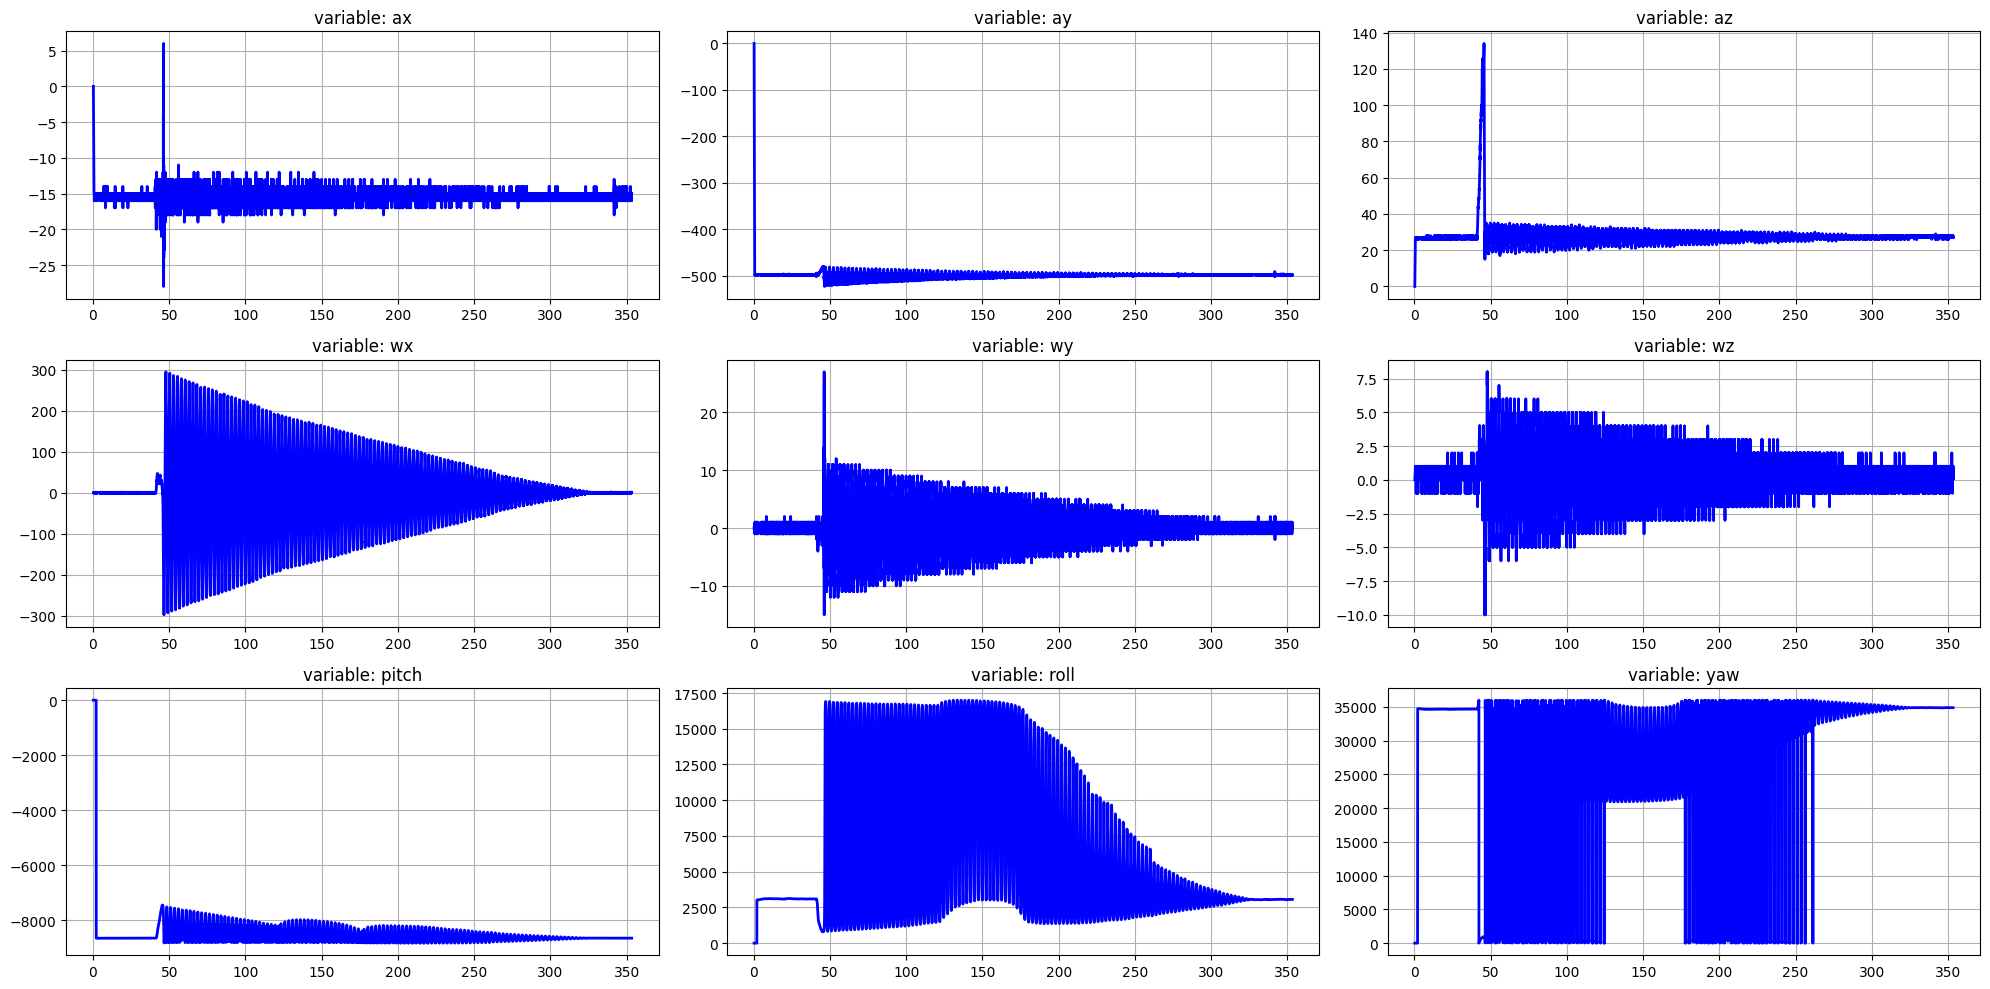

In [42]:
def plotAll(df, time, limits=None):
    target = df.copy() if not limits else df.loc[(df.time >= limits[0]) & (df.time <= limits[1])]

    plt.figure(figsize=(20, 10))
    for i, key in enumerate(['ax', 'ay', 'az', 'wx', 'wy', 'wz', 'pitch', 'roll', 'yaw']):
        plt.subplot(3, 3, i+1)
        plt.plot(time, target[key], color='blue', linewidth=2)
        plt.title(f'variable: {key}'), plt.grid()

    plt.tight_layout()
    plt.show()


plotAll(df, df.time, limits=None)

### VALORES ÚNICOS

In [43]:
def showUnique(df):
    w = max(len(c) for c in df.columns)  # largura do maior nome de coluna

    for col in df.columns:
        try:
            unique = df[col].unique().tolist()
            N      = len(unique)
            exemplo = ', '.join(map(str, unique[:10]))
            print(f'{col:<{w}}  [{exemplo}{f" ... +{len(unique)}" if N > 10 else ""}]')
        except Exception as error:
            print(error)    

showUnique(df)

time   [0.2720000147819519, 0.6019999980926514, 0.6119999885559082, 0.621999979019165, 0.6320000290870667, 0.6520000100135803, 0.6620000004768372, 0.671999990940094, 0.6819999814033508, 0.7020000219345093 ... +23375]
e      [0.0, -0.5, -1.0, -1.5, -2.0, -2.5, -3.0, -3.5, -4.0, -4.5 ... +82]
ay     [0.0, -498.0, -499.0, -497.0, -496.0, -500.0, -501.0, -495.0, -494.0, -493.0 ... +45]
wx     [0.0, -1.0, 1.0, -2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0 ... +592]
wy     [0.0, -1.0, 1.0, 2.0, -2.0, -3.0, -4.0, 13.0, 14.0, 6.0 ... +37]
roll   [0.0, 3005.0, 3004.0, 3006.0, 3008.0, 3009.0, 3011.0, 3013.0, 3014.0, 3015.0 ... +8192]
yaw    [0.0, 34741.0, 34742.0, 34740.0, 34738.0, 34737.0, 34735.0, 34733.0, 34732.0, 34731.0 ... +8047]
wz     [0.0, 1.0, -1.0, 2.0, -2.0, 3.0, 4.0, -3.0, -4.0, -5.0 ... +19]
pitch  [0.0, -8646.0, -8647.0, -8648.0, -8645.0, -8644.0, -8643.0, -8642.0, -8640.0, -8639.0 ... +1266]
ax     [0.0, -15.0, -16.0, -14.0, -17.0, -13.0, -18.0, -19.0, -20.0, -12.0 ... +25]
az     [0.0, 27.

# PERÍODO DE AMOSTRAGEM
- Verificando a distribuição do período para verificar número de outliers

0.01


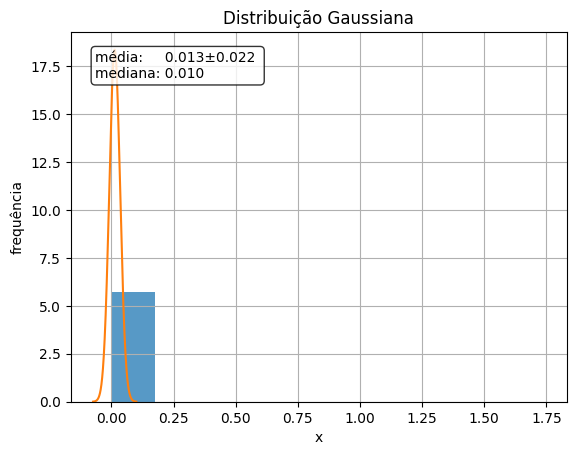

In [44]:
def gaussian(data):
    data  = np.array(data)
    n     = data.shape[0]
    mu    = data.mean()
    sigma = data.std()

    x  = np.linspace(mu - 4*sigma, mu + 4*sigma, 400)
    y  = (1/(sigma*np.sqrt(2*np.pi))) * np.exp(-0.5*((x - mu)/sigma)**2)
    plt.title(f'Distribuição Gaussiana')
    plt.hist(data, density=True, alpha=0.75)
    plt.plot(x, y)
    
    text = f'média:     {mu:.3f}±{sigma:.3f} \nmediana: {np.median(data):.3f}'
    opts = dict(boxstyle='round', facecolor='white', alpha=0.8)
    plt.text(0.05, 0.95, text, transform=plt.gca().transAxes, verticalalignment='top', bbox=opts)
    plt.xlabel('x'); plt.ylabel('frequência'); plt.grid()


time = df.time.diff()[1:].to_numpy()
dt   = np.median(time).round(3)

print(dt)
gaussian(time)

In [45]:
def normalizePeriod(df, key, dt=0.15):
    df = df.copy().sort_values(key)
    df[key] = df[key] - df[key].iloc[0]

    initTime  = df[key].iloc[0]
    finalTime = df[key].iloc[-1] + dt
    n = int(np.floor((finalTime - initTime) / dt)) + 1
    newAxis = np.round(np.linspace(initTime, initTime + dt*(n-1), n), 10)

    target = pd.DataFrame({key: newAxis})
    # direction='backward' equivale ao ffill no reindex
    out = pd.merge_asof(target, df, on=key, direction='backward')
    return out



df = normalizePeriod(df, 'time', dt)
df

,time,e,ay,wx,wy,roll,yaw,wz,pitch,ax,az
0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
35295,352.95,0.0,-499.0,0.0,0.0,3061.0,34879.0,0.0,-8643.0,-15.0,28.0
35296,352.96,0.0,-498.0,-1.0,0.0,3061.0,34880.0,0.0,-8643.0,-16.0,28.0
35297,352.97,0.0,-498.0,-1.0,0.0,3061.0,34880.0,0.0,-8643.0,-16.0,28.0
35298,352.98,0.0,-497.0,-1.0,0.0,3061.0,34880.0,0.0,-8643.0,-15.0,27.0


# VALORES PASSADOS

In [54]:
def getStates(df, key, var='y', n=10):
    table = df.copy() 
    table[f'{var}'] = table[key]

    for i in range(1, n):
        table[f'{var}(n-{i})'] = table[key].shift(i)

    table.fillna(0, inplace=True)
    columns = [f'{var}'] + [f'{var}(n-{i})' for i in range(1, n)]
    return table[columns]


N_STATES = 10
xData = getStates(df, 'wx', var='wx', n=N_STATES)

In [56]:
df = pd.concat([xData, df.e], axis=1)
df

,wx,wx(n-1),wx(n-2),wx(n-3),wx(n-4),wx(n-5),wx(n-6),wx(n-7),wx(n-8),wx(n-9),e
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
35295,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,0.0
35296,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0,0.0
35297,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0
35298,-1.0,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [58]:
df.to_csv('../Dataset/model.csv', index=None)